# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [1]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
Already up to date.
  Using cached asgiref-3.8.1-py3-none-any.whl.metadata (9.3 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cryptography-44.0.2-cp39-abi3-manylinux_2_34_x86_64.whl.metadata (5.7 kB)
  Using cached debugpy-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached distlib-0.3.9-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached Django-5.1.3-py3-none-any.wh

In [2]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [3]:
import sys
sys.path.append('/content/Scrapify/src')

In [15]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [5]:
!pip install googlesearch-python

In [13]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [7]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

In [16]:
simple_query = 'site:gov.et filetype:pdf "አካባቢ ግንባታ" OR "አካባቢ መረጃ" OR "ሕግ ስርዓት" OR "የግል ተቋማት" OR "አስተዳደር ስርዓት" OR "የመንግስት ትእዛዝ" OR "የትእዛዝ ቁጥር" OR "የፌዴራል መብት" OR "የአካባቢ መንግሥት"'
urls = get_links_from_simple_search(simple_query, 100)
filtered_urls = filter_url(urls)
# scrape(filtered_urls, "Yonas Awoke")



# **Lets visualize our scraping status**

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




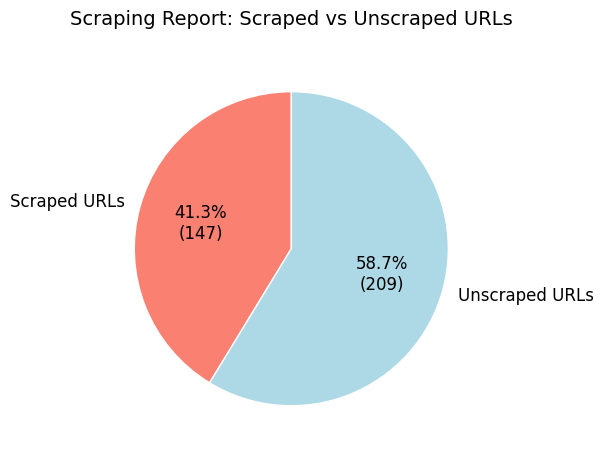

In [18]:
# Example usage:
plot_scraping_report()

### Normalizing our data

How to normalize data?

1. define the path the jsonl file is found as variable
2. define the path you want to store the normaliez text file
3. call the function `normalize_jsonl_file  ` with the two parameters

In [19]:
# let's test our data so that


test_string = """
ሀሁሂሃሄህሆ  # Basic ሀ family
ሐሑሒሓሔሕሖ  # �ሐ → ሀ variants
ኀኁኂኃኄኅኆ  # ኀ → ሀ variants
ኹኺኻኼኽኾ    # ኹ → ሁ variants
ሠሡሢሣሤሥሦ  # ሠ → ሰ variants
ዐዑዒዓዔዕዖ  # ዐ → አ variants
ጸጹጺጻጼጽጾ  # ጸ → ፀ variants

Punctuation Tests:
Newlines\nand\t tabs
Double colons:: ። Amharic period
Multiple spaces   between   words

Number Tests (Western): 1234567890
Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠

Edge Cases:
Empty string: ''
Mixed variants: ሐኀሠዐጸ in one word
"""

# Test the function in Colab
normalized_text = normalize(test_string)
print("Original:\n", test_string)
print("\nNormalized:\n", normalized_text)

Original:
 
ሀሁሂሃሄህሆ  # Basic ሀ family
ሐሑሒሓሔሕሖ  # �ሐ → ሀ variants
ኀኁኂኃኄኅኆ  # ኀ → ሀ variants
ኹኺኻኼኽኾ    # ኹ → ሁ variants
ሠሡሢሣሤሥሦ  # ሠ → ሰ variants
ዐዑዒዓዔዕዖ  # ዐ → አ variants
ጸጹጺጻጼጽጾ  # ጸ → ፀ variants

Punctuation Tests:
Newlines
and	 tabs
Double colons:: ። Amharic period
Multiple spaces   between   words

Number Tests (Western): 1234567890
Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠

Edge Cases:
Empty string: ''
Mixed variants: ሐኀሠዐጸ in one word


Normalized:
  ሀሁሂሃሄህሆ  # Basic ሀ family ሀሁሂሃሄህሆ  # �ሀ → ሀ variants ሀሁሂሃሄህሆ  # ሀ → ሀ variants ሁሂሃሄህሆ    # ሁ → ሁ variants ሰሱሲሳሴስሶ  # ሰ → ሰ variants አኡኢኣኤእኦ  # አ → አ variants ፀፁፂፃፄፅፆ  # ፀ → ፀ variants  Punctuation Tests: Newlines and	 tabs Double colons። ። Amharic period Multiple spaces   between   words  Number Tests (Western): 1234567890 Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠  Edge Cases: Empty string: '' Mixed variants: ሀሀሰአፀ in one word 


In [26]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [21]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [24]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

In [27]:
test_file_path = '/content/Scrapify/extracted_data.jsonl'
destination_file_path = '/content/Scrapify/normalized.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


Read 5 records from /content/Scrapify/extracted_data.jsonl.
